# Fraud Detection in Electricity and Gas Consumption Challenge

This challenge is meant to ....

## Model Pipeline
- ### Exploratory Data Analysis
  - Inspected features in client data
  - Made count plots for features in client data with `target` as hue
  - Checked fraudulent vs non-fraudulent samples
  - Checked correlation between features
  - Removed one of each pair of highly correlated features

 - ### Feature Engineering
   - Generated `mean`, `sum` and `standard deviations` of invoice data for each client

## Methodology
- Scaled to the data using standard scaling
- Used grid search with a 5-fold split, with `auc_score` as the scoring metric criteria to explore different hyperparameter combinations for models

Below is table showing the best scores for each model:
<table>
    <tr>
        <th>Logistic Regression</th>
        <th>0.760</th>
    </tr>
    <tr>
        <td>Decision Tree Classifier</td>
        <td>0.800</td>
    </tr>
    <tr>
        <td>Frandom Forest Classifier</td>
        <td>0.826</td>
    </tr>
    <tr>
        <td>LGBMClassifier</td>
        <td>0.857</td>
    </tr>
    <tr>
        <td>XGBClassifier</td>
        <td>0.858</td>
    </tr>
</table>

Highest Publice Leader Mean Squared Error: ***0.8588***
<br>
Rank: ***129***

### Importing necessary packages for data handling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

### Getting data

In [4]:
train_path = "x__data/train"
test_path = "x__data/test"
plots_dir = "x__plots"


client_train = pd.read_csv(f"{train_path}/client_train.csv")
invoice_train = pd.read_csv(f"{train_path}/invoice_train.csv", low_memory=False)

client_test = pd.read_csv(f"{test_path}/client_test.csv")
invoice_test = pd.read_csv(f"{test_path}/invoice_test.csv")

In [5]:
d = {"ELEC":0, "GAZ":1}
invoice_train["counter_type"] = invoice_train["counter_type"].map(d)
invoice_test["counter_type"] = invoice_test["counter_type"].map(d)

In [6]:
invoice_test

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,0
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,0
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,0
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,0
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,0
1939726,test_Client_9999,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,0
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,0
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,0


### EDA

#### Checking the features

In [7]:
client_train.dtypes

disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [8]:
invoice_train.dtypes

client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type             int64
dtype: object

## Inspecting Client data

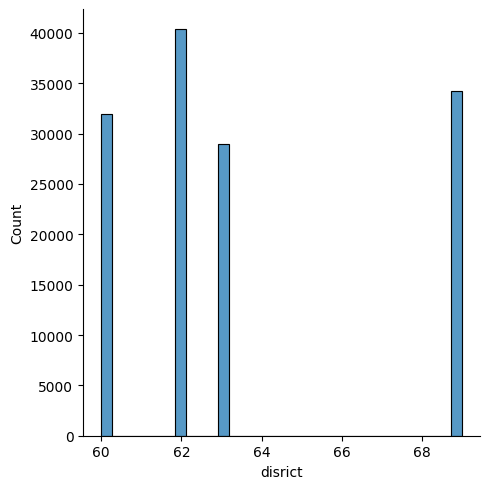

In [7]:
sns.displot(client_train["disrict"])
plt.show()

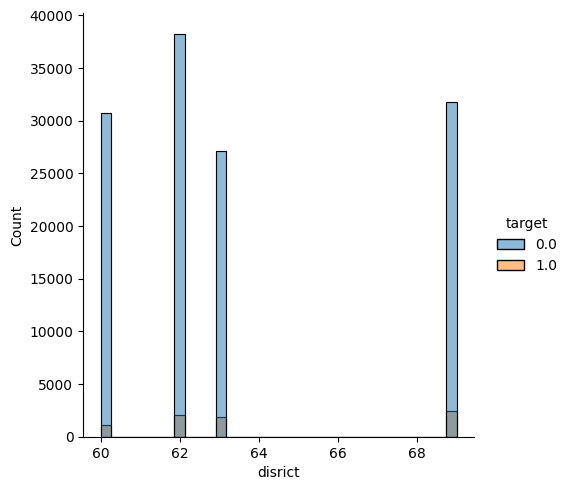

In [9]:
sns.displot(client_train, x="disrict", hue="target")
# plt.savefig(os.path.join(plots_dir, "district_count_plot.png"))
plt.show()

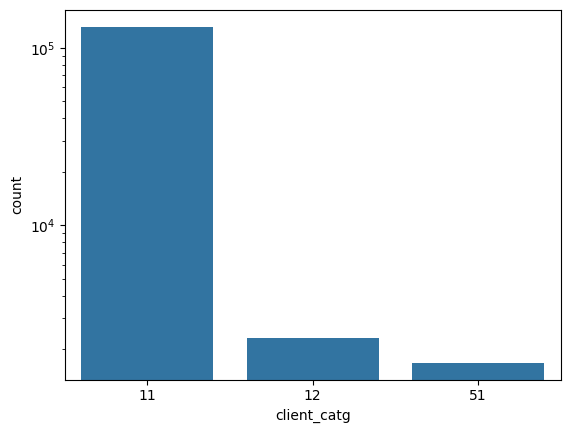

In [10]:
fig, ax = plt.subplots()
sns.countplot(client_train, x="client_catg", ax=ax)
ax.set_yscale("log")
plt.show()
# plt.savefig(os.path.join(plots_dir, "client_catg_count_plot.png"))

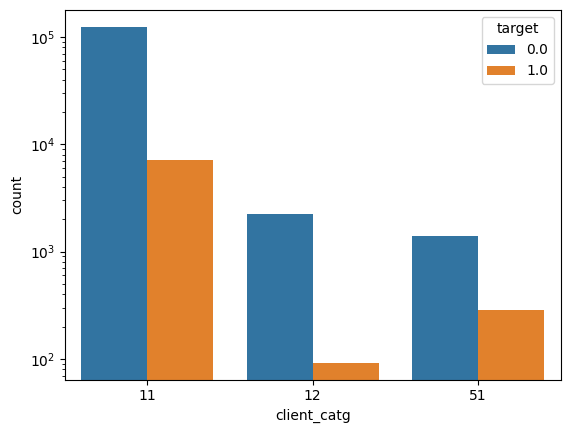

In [11]:
fig, ax = plt.subplots()
sns.countplot(client_train, x="client_catg", ax=ax, hue="target")
ax.set_yscale("log")
# plt.savefig(os.path.join(plots_dir, "client_catg_count_plot.png"))
plt.show()

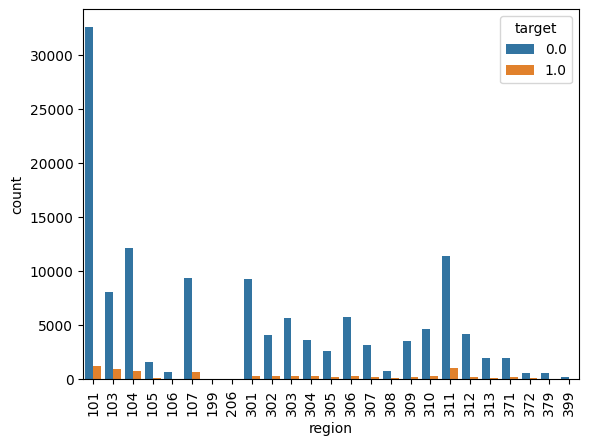

In [12]:
fig, ax = plt.subplots()
sns.countplot(client_train, x="region", ax=ax, hue="target")
plt.xticks(rotation=90)
plt.show()
# plt.savefig(os.path.join(plots_dir, "region_count_plot.png"))

In [12]:
client_train["target"].value_counts(normalize=True)

target
0.0    0.944159
1.0    0.055841
Name: proportion, dtype: float64

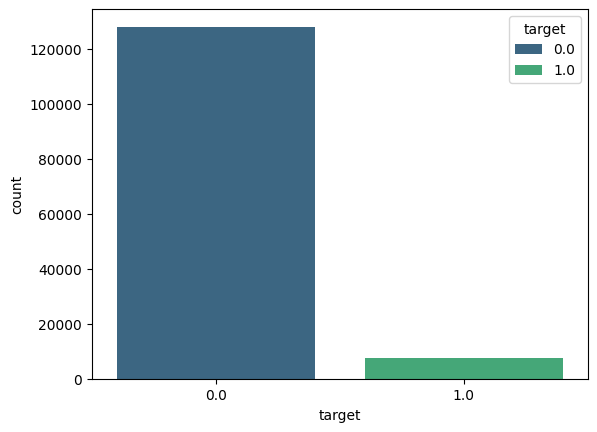

In [20]:
# sns.countplot(client_train, x="target", palette="viridis", hue="target")
# plt.savefig(f"{plots_dir}/target_countplot.png")

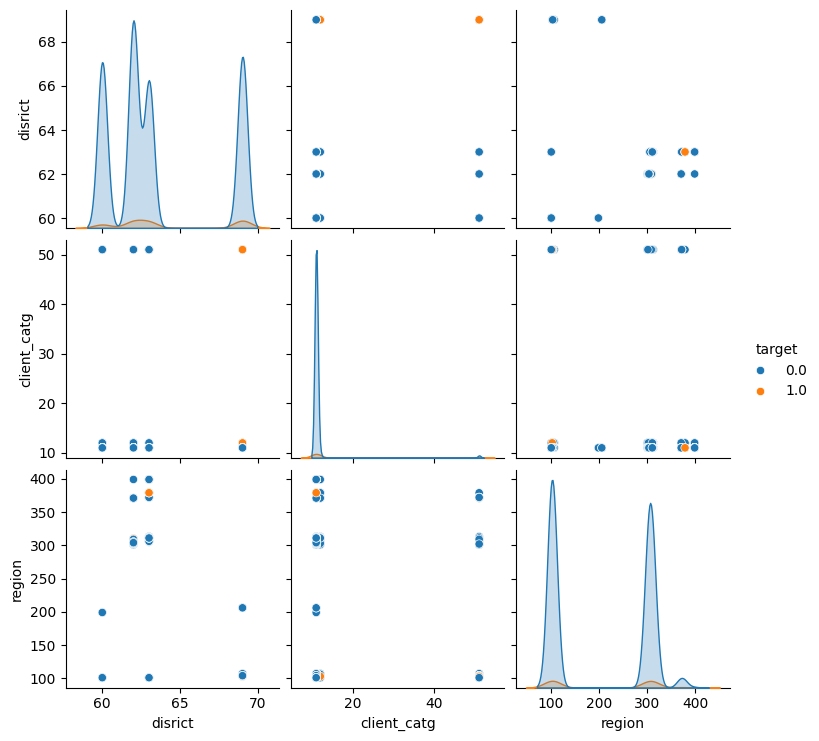

In [13]:
sns.pairplot(client_train.select_dtypes("number"), hue="target")
plt.show()

## Inspecting Invoice Data

In [14]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01,3.121334e-01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03,4.633640e-01
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00,0.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00,0.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00,1.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05,1.000000e+00


### Fraudulent vs Non-Fraudulent

In [11]:
non_fraud_ids = client_train[client_train["target"]==0]["client_id"]
fraud_ids = client_train[client_train["target"]==1]["client_id"]

In [12]:
normal = non_fraud_ids.sample(1).values[0]
fraudster = fraud_ids.sample(1).values[0]

In [13]:
invoice_train[invoice_train["client_id"]==normal].sort_values("invoice_date").describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
count,35.0,35.0,35.0,35.000000,35.0,35.000000,35.0,35.0,35.0,35.000000,35.000000,35.000000,35.0
mean,11.0,146001.0,413.0,7.342857,1.0,436.000000,0.0,0.0,0.0,5787.342857,6223.342857,4.285714,0.0
std,0.0,0.0,0.0,1.433688,0.0,292.896087,0.0,0.0,0.0,5048.975598,5191.389341,1.202239,0.0
min,11.0,146001.0,413.0,6.000000,1.0,3.000000,0.0,0.0,0.0,0.000000,3.000000,2.000000,0.0
25%,11.0,146001.0,413.0,6.000000,1.0,357.000000,0.0,0.0,0.0,1106.500000,1493.000000,4.000000,0.0
50%,11.0,146001.0,413.0,6.000000,1.0,396.000000,0.0,0.0,0.0,4600.000000,5321.000000,4.000000,0.0
75%,11.0,146001.0,413.0,9.000000,1.0,490.000000,0.0,0.0,0.0,9961.000000,10439.500000,4.000000,0.0
max,11.0,146001.0,413.0,9.000000,1.0,1238.000000,0.0,0.0,0.0,15091.000000,15260.000000,8.000000,0.0


In [14]:
invoice_train[invoice_train["client_id"]==fraudster].sort_values("invoice_date").describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
count,50.000000,5.000000e+01,50.000000,50.000000,50.0,50.000000,50.000000,50.0,50.0,50.000000,50.000000,50.000000,50.000000
mean,25.500000,3.724069e+06,104.000000,6.660000,1.0,202.360000,0.920000,0.0,0.0,5986.560000,6189.840000,3.840000,0.500000
std,14.647212,3.011685e+06,100.005102,1.042172,0.0,171.185037,6.505382,0.0,0.0,3006.704014,3066.069507,0.548095,0.505076
min,11.000000,7.426530e+05,5.000000,6.000000,1.0,0.000000,0.000000,0.0,0.0,1912.000000,2085.000000,2.000000,0.000000
25%,11.000000,7.426530e+05,5.000000,6.000000,1.0,120.750000,0.000000,0.0,0.0,3525.000000,3662.000000,4.000000,0.000000
50%,25.500000,3.724069e+06,104.000000,6.000000,1.0,164.000000,0.000000,0.0,0.0,5030.000000,5611.000000,4.000000,0.500000
75%,40.000000,6.705485e+06,203.000000,8.000000,1.0,237.000000,0.000000,0.0,0.0,8109.750000,8426.750000,4.000000,1.000000
max,40.000000,6.705485e+06,203.000000,9.000000,1.0,846.000000,46.000000,0.0,0.0,11907.000000,12753.000000,4.000000,1.000000


## Feature Engineering Function

In [9]:
def process_data(client, invoice, num_cols):
    invoice_grouped = invoice.groupby("client_id")[num_cols].agg(["mean", "std", "sum"])
    
    series = []
    for col_a, col_b in invoice_grouped.columns:
        new_col = f"{col_a}_{col_b}"
        item = invoice_grouped[col_a, col_b].rename(new_col)
        if col_b == "std":
            item = item.fillna(0) ## fill with zero for clients who only have one entry in the invoice dataset
        series.append(item)
    
    inv_df = pd.concat(series, axis=1)
    full_df = pd.concat([inv_df, client.set_index("client_id")], axis=1)

    cols_to_drop=["tarif_type", "old_index"]
    
    for col in cols_to_drop:
        full_df.drop([f"{col}_mean", f"{col}_std", f"{col}_sum"], axis=1, inplace=True)

    full_df.drop("creation_date", axis=1, inplace=True)

    return full_df

In [10]:
num_cols = list(invoice_train.select_dtypes("number").columns)

invoice_train_grouped = invoice_train.groupby("client_id")[num_cols].agg(["mean", "std", "sum"])

In [14]:
invoice_train_grouped.columns

MultiIndex([(          'tarif_type', 'mean'),
            (          'tarif_type',  'std'),
            (          'tarif_type',  'sum'),
            (      'counter_number', 'mean'),
            (      'counter_number',  'std'),
            (      'counter_number',  'sum'),
            (        'counter_code', 'mean'),
            (        'counter_code',  'std'),
            (        'counter_code',  'sum'),
            (    'reading_remarque', 'mean'),
            (    'reading_remarque',  'std'),
            (    'reading_remarque',  'sum'),
            ( 'counter_coefficient', 'mean'),
            ( 'counter_coefficient',  'std'),
            ( 'counter_coefficient',  'sum'),
            ('consommation_level_1', 'mean'),
            ('consommation_level_1',  'std'),
            ('consommation_level_1',  'sum'),
            ('consommation_level_2', 'mean'),
            ('consommation_level_2',  'std'),
            ('consommation_level_2',  'sum'),
            ('consommation_level_3

In [15]:
# series = []
# for col_a, col_b in invoice_train_grouped.columns:
#     new_col = f"{col_a}_{col_b}"
#     item = invoice_train_grouped[col_a, col_b].rename(new_col)
#     if col_b == "std":
#         item = item.fillna(0) ## fill with zero for clients who only have one entry in the invoice dataset
#     series.append(item)

# inv_df = pd.concat(series, axis=1)

# full_train_df = pd.concat([inv_df, client_train.set_index("client_id")], axis=1)

# full_train_df.isna().sum()

In [16]:
invoice_train_grouped["tarif_type", "std"][np.isnan(invoice_train_grouped["tarif_type", "std"])].index[9]

'train_Client_100250'

In [17]:
invoice_train[invoice_train["client_id"]=='train_Client_100018']

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
854,train_Client_100018,2019-05-03,11,2178700025696,0,413,8,1,600,300,325,0,4865,6090,3,0


In [11]:
num_cols = list(invoice_train.select_dtypes("number").columns)
full_train_df = process_data(client_train, invoice_train, num_cols)

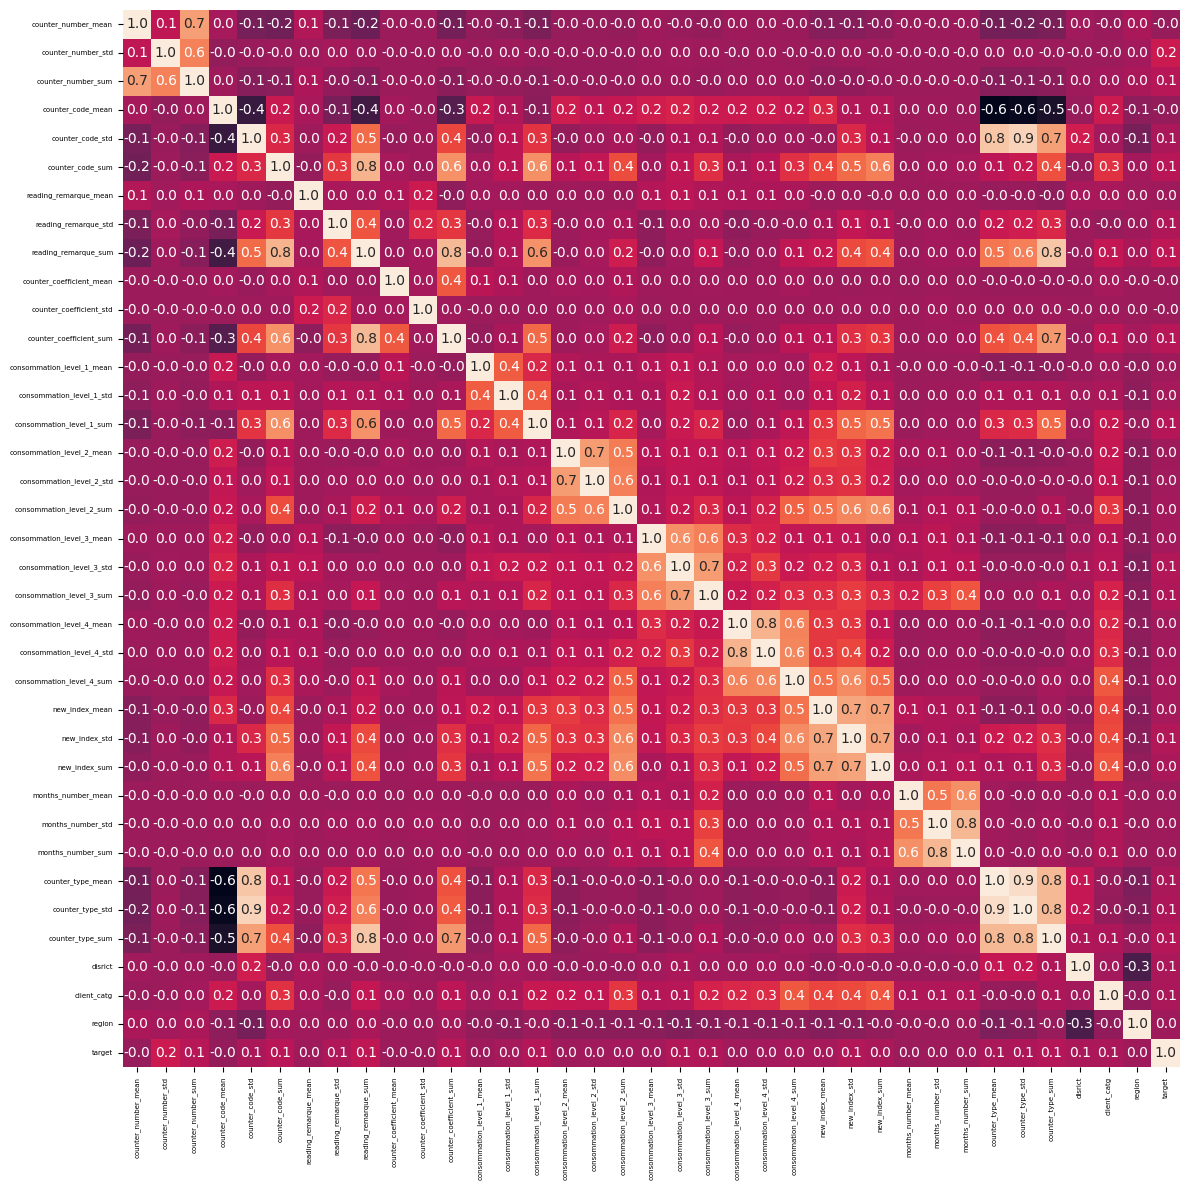

In [26]:
fig = plt.figure(figsize=(12,12))
g = sns.heatmap(full_train_df.select_dtypes("number").corr(), annot=True, fmt=".1f", square=True, cbar=False)
g.set_xticklabels(labels=g.get_xmajorticklabels(),fontsize=5)
g.set_yticklabels(labels=g.get_ymajorticklabels(),fontsize=5)
plt.tight_layout()
plt.show()

### Insights
- seems the `tarif_type` is highly correlated with `counter_type`
- seems the `old_index` is highly correlated with `new_index`

In [27]:
# cols_to_drop=["tarif_type", "old_index"]

# for col in cols_to_drop:
#     full_train_df.drop([f"{col}_mean", f"{col}_std", f"{col}_sum"], axis=1, inplace=True)

In [12]:
full_train_df

,counter_number_mean,counter_number_std,counter_number_sum,counter_code_mean,counter_code_std,counter_code_sum,reading_remarque_mean,reading_remarque_std,reading_remarque_sum,counter_coefficient_mean,...,months_number_mean,months_number_std,months_number_sum,counter_type_mean,counter_type_std,counter_type_sum,disrict,client_catg,region,target
client_id,,,,,,,,,,,,,,,,,,,,,
train_Client_0,1.335667e+06,0.000000e+00,46748345,203.685714,1.529541,7129,6.971429,1.248192,244,1.0,...,4.628571,2.101620,162,0.000000,0.000000,0,60,11,101,0.0
train_Client_1,6.789020e+05,0.000000e+00,25119374,203.000000,0.000000,7511,7.216216,1.377097,267,1.0,...,4.324324,1.375461,160,0.000000,0.000000,0,69,11,107,0.0
train_Client_10,5.727650e+05,0.000000e+00,10309770,203.222222,0.942809,3658,7.055556,1.258955,127,1.0,...,6.444444,3.399346,116,0.000000,0.000000,0,62,11,301,0.0
train_Client_100,2.078000e+03,0.000000e+00,41560,413.000000,0.000000,8260,6.150000,0.670820,123,1.0,...,4.200000,0.615587,84,0.000000,0.000000,0,69,11,105,0.0
train_Client_1000,1.957500e+04,0.000000e+00,274050,207.000000,0.000000,2898,8.857143,0.363137,124,1.0,...,3.714286,0.726273,52,0.000000,0.000000,0,62,11,303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_Client_99995,5.423355e+05,3.729146e+05,38505820,110.267606,101.628027,7829,6.000000,0.000000,426,1.0,...,4.225352,1.098014,300,0.478873,0.503109,34,62,11,304,0.0
train_Client_99996,1.837554e+06,2.172997e+06,75339726,103.536585,102.224287,4245,8.487805,1.142846,348,1.0,...,3.902439,0.436170,160,0.512195,0.506061,21,63,11,311,0.0
train_Client_99997,1.602303e+05,1.296327e+05,5768290,128.444444,99.871473,4624,9.000000,0.000000,324,1.0,...,4.111111,0.666667,148,0.388889,0.494413,14,63,11,311,0.0


## Preparing for training

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

## models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [14]:
random_state = 42
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [15]:
X = full_train_df.drop(["target"], axis=1)
y = full_train_df["target"]

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Logistic Regression

In [37]:
params = {
    "C": [0.2,0.5,1]
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), params, scoring="roc_auc", cv=skf, verbose=10)
grid_lr.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=0.2.......................................................
[CV 1/5; 1/3] END ........................C=0.2;, score=0.758 total time=   2.2s
[CV 2/5; 1/3] START C=0.2.......................................................
[CV 2/5; 1/3] END ........................C=0.2;, score=0.760 total time=   1.7s
[CV 3/5; 1/3] START C=0.2.......................................................
[CV 3/5; 1/3] END ........................C=0.2;, score=0.762 total time=   1.3s
[CV 4/5; 1/3] START C=0.2.......................................................
[CV 4/5; 1/3] END ........................C=0.2;, score=0.756 total time=   1.3s
[CV 5/5; 1/3] START C=0.2.......................................................
[CV 5/5; 1/3] END ........................C=0.2;, score=0.760 total time=   1.2s
[CV 1/5; 2/3] START C=0.5.......................................................
[CV 1/5; 2/3] END ........................C=0.5;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.2, 0.5, 1]}, scoring='roc_auc', verbose=10)

##### Decision Tree Classifier

In [41]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2,4,6,8],
    "max_features": ["sqrt","log2",None],
    "class_weight": ["balanced",None]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_dt.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 1/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.717 total time=   0.2s
[CV 2/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 2/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.684 total time=   0.1s
[CV 3/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 3/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.680 total time=   0.1s
[CV 4/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 4/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.716 total time=   0.2s
[CV 5/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='roc_auc', verbose=10)

In [42]:
print(grid_dt.best_score_)
print(grid_dt.best_params_)

0.8008869933761786
{'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None}


##### Scalar Vector Classifier

In [58]:
params = {
    "C": [0.5, 1.0, 1.5],
    "class_weight": [None, "balanced"]
}

grid_svc = GridSearchCV(SVC(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_svc.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.5, class_weight=None....................................
[CV 1/5; 1/6] END .....C=0.5, class_weight=None;, score=0.682 total time=29.8min
[CV 2/5; 1/6] START C=0.5, class_weight=None....................................
[CV 2/5; 1/6] END .....C=0.5, class_weight=None;, score=0.657 total time=20.7min
[CV 3/5; 1/6] START C=0.5, class_weight=None....................................
[CV 3/5; 1/6] END .....C=0.5, class_weight=None;, score=0.671 total time=17.2min
[CV 4/5; 1/6] START C=0.5, class_weight=None....................................


KeyboardInterrupt: 

In [ ]:
print(grid_svc.best_score_)
print(grid_svc.best_params_)

##### Random Forest Classifier

In [ ]:
params = {
    "n_estimators": [500, 1000],
    "max_depth": [2,4,6,8],
    "class_weight": [None, "balanced", "balanced_subsample"]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_rfc.fit(X,y)
# params = {
#     "n_estimators": [100,500, 1000],
#     "max_depth": [2,4,6,8],
# }

# grid_rfc = GridSearchCV(RandomForestClassifier(class_weight="balanced_subsample"), params, scoring="roc_auc", cv=skf, verbose=10)
# grid_rfc.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 1/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.786 total time= 1.1min
[CV 2/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 2/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.790 total time=  56.6s
[CV 3/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 3/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.771 total time= 1.0min
[CV 4/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 4/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.775 total time= 1.0min
[CV 5/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 5/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.786 total time= 1.1min
[CV 1/5; 2/24] START class_w

In [ ]:
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)
# 0.826150770636995
# {'class_weight': None, 'max_depth': 8, 'n_estimators': 500}

##### LGBMClassifier

In [46]:
# params = {
#     "n_estimators": [200, 500, 1000],
#     "max_depth": [2,4,6,8],
#     "learning_rate": [0.09, 0.1, 0.4],
#     "class_weight": [None, "balanced"]
# }

# grid_lgbm = GridSearchCV(LGBMClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
# grid_lgbm.fit(X,y)
params = {
    "n_estimators": [200, 500],
    "max_depth": [6,8],
    # "learning_rate": [0.09, 0.1, 0.4],
    # "class_weight": [None, "balanced"]
}

temp_grid = GridSearchCV(LGBMClassifier(num_leaves=60, boosting_type="rf"), params, scoring="roc_auc", cv=skf, verbose=10)
temp_grid.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=6, n_estimators=200...............................
[LightGBM] [Info] Number of positive: 6053, number of negative: 102341
[CV 1/5; 1/4] END ..max_depth=6, n_estimators=200;, score=nan total time=   1.2s
[CV 2/5; 1/4] START max_depth=6, n_estimators=200...............................
[LightGBM] [Info] Number of positive: 6053, number of negative: 102341
[CV 2/5; 1/4] END ..max_depth=6, n_estimators=200;, score=nan total time=   1.1s
[CV 3/5; 1/4] START max_depth=6, n_estimators=200...............................
[LightGBM] [Info] Number of positive: 6052, number of negative: 102342
[CV 3/5; 1/4] END ..max_depth=6, n_estimators=200;, score=nan total time=   1.2s
[CV 4/5; 1/4] START max_depth=6, n_estimators=200...............................
[LightGBM] [Info] Number of positive: 6053, number of negative: 102342
[CV 4/5; 1/4] END ..max_depth=6, n_estimators=200;, score=nan total time=   1.2s
[CV 5/5;

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightgbm\sklearn.py", line 1142, in fit
    super().fit(
  File "C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightgbm\sklearn.py", line 842, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightgbm\engine.py", line 255, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightgbm\basic.py", line 3204, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate(
  File "C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightgbm\basic.py", line 242, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode('utf-8'))
lightgbm.basic.LightGBMError: Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at D:\a\1\s\lightgbm-python\src\boosting\rf.hpp, line 37 .



In [47]:
print(temp_grid.best_score_)
print(temp_grid.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [19]:
print(grid_lgbm.best_score_)
print(grid_lgbm.best_params_)

# 0.8571949371151912
# {'class_weight': None, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

## dart
# 0.860
# {'max-depth':8, n_estimators: 500, num_leaves: 60}

0.8571949371151912
{'class_weight': None, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


##### Catboost Classifier

In [ ]:
params = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.09, 0.1, 0.8]
}

grid_cat = GridSearchCV(CatBoostClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_cat.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
0:	learn: 0.5775298	total: 211ms	remaining: 42.1s
1:	learn: 0.4865991	total: 228ms	remaining: 22.6s
2:	learn: 0.4212060	total: 243ms	remaining: 16s
3:	learn: 0.3673401	total: 259ms	remaining: 12.7s
4:	learn: 0.3284111	total: 273ms	remaining: 10.7s
5:	learn: 0.2958008	total: 288ms	remaining: 9.3s
6:	learn: 0.2756631	total: 304ms	remaining: 8.39s
7:	learn: 0.2563300	total: 319ms	remaining: 7.66s
8:	learn: 0.2403475	total: 334ms	remaining: 7.09s
9:	learn: 0.2301262	total: 349ms	remaining: 6.63s
10:	learn: 0.2211660	total: 364ms	remaining: 6.25s
11:	learn: 0.2137454	total: 377ms	remaining: 5.91s
12:	learn: 0.2077160	total: 392ms	remaining: 5.64s
13:	learn: 0.2030688	total: 409ms	remaining: 5.43s
14:	learn: 0.1990320	total: 436ms	remaining: 5.38s
15:	learn: 0.1954601	total: 454ms	remaining: 5.22s
16:	learn: 0.1926487	total: 472ms	remaining: 5.08s
17:

In [ ]:
print(grid_cat.best_score_)
print(grid_cat.best_params_)

##### XGBOOST

In [48]:
from xgboost import XGBClassifier

In [49]:
params = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.09, 0.1, 0.8]
}

grid_xgb = GridSearchCV(XGBClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_xgb.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 1/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.838 total time=   4.7s
[CV 2/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 2/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.845 total time=   4.1s
[CV 3/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 3/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.848 total time=   4.2s
[CV 4/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 4/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.846 total time=   4.3s
[CV 5/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 5/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.837 total time=   4.3s
[CV 1/5; 2/36] START le

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_t...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.09, 0.1, 0.8],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [200, 500, 1000]},
             scoring='roc_auc', verbose=10)

In [51]:
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

0.8584854800921258
{'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 200}


##### Stacking

In [21]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [19]:
estimators = [
    ("xgbc", XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.09)),
    ("lgbm", XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1)),
]

params = {
    "passthrough": [False]
}

grid_stack = GridSearchCV(StackingClassifier(estimators, stack_method="predict_proba", final_estimator=DecisionTreeClassifier(max_depth=8)), params, scoring="roc_auc", cv=skf, verbose=10)
grid_stack.fit(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START passthrough=False...........................................
[CV 1/5; 1/1] END ............passthrough=False;, score=0.849 total time= 1.2min
[CV 2/5; 1/1] START passthrough=False...........................................


KeyboardInterrupt: 

In [26]:
print(grid_stack.best_score_)
print(grid_stack.best_params_)

0.858463339574104
{'passthrough': False}


#### Voting Classifier

In [25]:
estimators = [
    ("xgbc", XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.09)),
    ("lgbm", XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1)),
]

params = {
    "voting": ["soft"]
}

grid_voting = GridSearchCV(VotingClassifier(estimators), params, scoring="roc_auc", cv=skf, verbose=10)
grid_voting.fit(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START voting=soft.................................................
[CV 1/5; 1/1] END ..................voting=soft;, score=0.858 total time=  12.7s
[CV 2/5; 1/1] START voting=soft.................................................
[CV 2/5; 1/1] END ..................voting=soft;, score=0.857 total time=  11.6s
[CV 3/5; 1/1] START voting=soft.................................................
[CV 3/5; 1/1] END ..................voting=soft;, score=0.863 total time=  13.0s
[CV 4/5; 1/1] START voting=soft.................................................
[CV 4/5; 1/1] END ..................voting=soft;, score=0.855 total time=  11.9s
[CV 5/5; 1/1] START voting=soft.................................................
[CV 5/5; 1/1] END ..................voting=soft;, score=0.857 total time=  12.3s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=VotingClassifier(estimators=[('xgbc',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gam...
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=200,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...))]),
             param_grid={'voting': ['soft']}, scoring='roc_auc', verbose=10)

In [26]:
print(grid_voting.best_score_)
print(grid_voting.best_params_)

0.8580928252124067
{'voting': 'soft'}


### Predicting for Submission

In [27]:
full_test_df = process_data(client_test, invoice_test, num_cols)

In [28]:
X_sub = scaler.transform(full_test_df)

In [30]:
preds = grid_stack.predict_proba(X_sub)[:,1]

In [31]:
preds

array([0.02962696, 0.0539472 , 0.03440101, ..., 0.78581697, 0.02670077,
       0.04071108])

### Submitting

In [32]:
sample_sub = pd.read_csv("x__data/SampleSubmission.csv")
sample_sub

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046
...,...,...
58064,test_Client_9995,0.882548
58065,test_Client_9996,0.715918
58066,test_Client_9997,0.285178
58067,test_Client_9998,0.154661


In [33]:
test_ids = full_test_df.index

In [34]:
# submission = sample_sub.copy()
# submission["target"]= preds
submission = pd.DataFrame({"client_id": test_ids, "target": preds})

In [35]:
submission

,client_id,target
0,test_Client_0,0.029627
1,test_Client_1,0.053947
2,test_Client_10,0.034401
3,test_Client_100,0.033811
4,test_Client_1000,0.036612
...,...,...
58064,test_Client_9995,0.026077
58065,test_Client_9996,0.055220
58066,test_Client_9997,0.785817
58067,test_Client_9998,0.026701


In [36]:
# save_name = "submission_stack.csv"
# submission.to_csv(f"x__submissions/{save_name}", index=False)